<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
<p>
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 
</p>    
<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.


**Le problème posé :**


*Stack Overflow est un site célèbre de question-réponses liées au développement informatique. Pour poser une question sur ce site, il faut entrer plusieurs tags de manière à retrouver facilement la question par la suite. Pour les utilisateurs expérimentés cela ne pose pas de problème, mais pour les nouveaux utilisateurs, il serait judicieux de suggérer quelques tags relatifs à la question posée.*

*Amateur de Stack Overflow, qui vous a souvent sauvé la mise, vous décidez d'aider la communauté en retour. Pour cela, vous développez un système de suggestion de tags pour le site. Celui-ci prendra la forme d’un algorithme de machine learning qui assigne automatiquement plusieurs tags pertinents à une question.*

 
    
<p>
La requête SQL suivante a permis de récupérer :

* les données du jeux d'entrainement:     

    ``SELECT Id, PostTypeId, Body, Title, Tags from Posts where Id<200000 and PostTypeId=1;``
    

* les données du jeux de test :

    ``SELECT Id, PostTypeId, Body, Title, Tags from Posts where Id>=200000 and Id<300000 and PostTypeId=1;``
    
</p>
<p>



In [119]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import p6_util
import p6_util_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <font color='blus'>1. Paramaters</font>

In [2]:
#-------------------------------------------------------------------------------
# Apply or not stemming process over sentences
#-------------------------------------------------------------------------------
is_stemming=False

## <font color='blus'>2. SOF Tags analysis</font>

In [11]:
import pandas as pd
file_name="./data/StackOverFlowTags.csv"
df_sof_tags=pd.read_csv(file_name)

In [12]:
df_sof_tags.shape, df_sof_tags.columns

((50000, 2), Index(['TagName', 'Count'], dtype='object'))

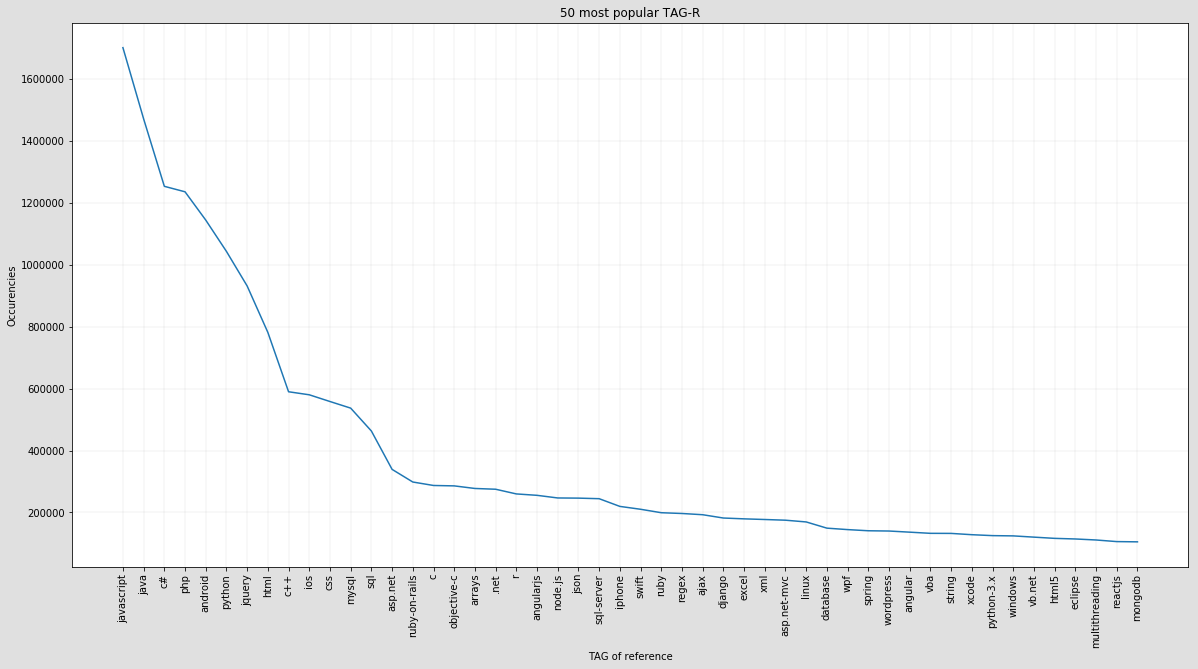

In [73]:
import p6_util_plot

item_count=50
title = str(item_count)+" most popular TAG-R"
p6_util_plot.ser_item_occurency_plot(df_sof_tags.TagName,df_sof_tags.Count,item_count\
                                     , title, p_x_title="TAG of reference", p_y_title="Occurencies")

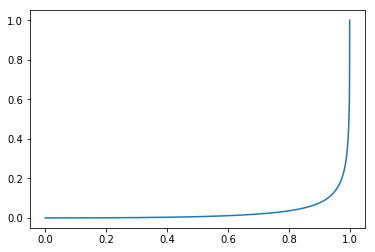

0.9433176218791084

In [17]:
import numpy as np

dep =df_sof_tags.Count.values

import matplotlib.pyplot as plt

lorenz = np.cumsum(np.sort(df_sof_tags.Count)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.show()

# Pour l'indice de GINI
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

---------------------------Count----------------------------
Moyenne: 948.7015
Mediane: 35.0
Modes: 0    1
dtype: int64
Variance: 311074324.89710766
Ecart:17637.299251787605


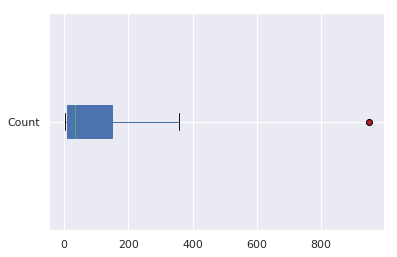

In [9]:
import p5_util_plot
import p3_util_plot
p3_util_plot.df_boxplot_list_display(df_sof_tags, ['Count'], show_outliers=False )


/home/bangui/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



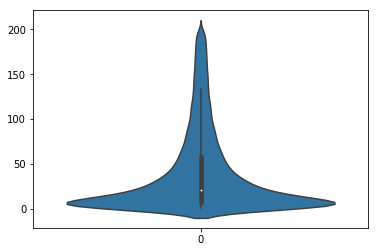

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.violinplot( data=df_sof_tags[df_sof_tags.Count<200].Count)

In [19]:
# Chapiro/Wilk test
x = df_sof_tags['Count']

shapiro_results = scipy.stats.shapiro(x[:4000])
print("Shapiro test : Statistics= {} / p-value= {}".format(shapiro_results[0],shapiro_results[1] ))


ks_results = scipy.stats.kstest(x, cdf='norm')
print("Kolmogorov/Smirnov test : Statistics= {} / p-value= {}".format(ks_results[0],ks_results[1] ))


# P-value is read as 0.0 (meaning it is "practically" 0 given the decimal accuracy of the test) then we have strong evidence to not reject the null-hypothesis



Shapiro test : Statistics= 0.01359790563583374 / p-value= 0.0
Kolmogorov/Smirnov test : Statistics= 0.9386498680518208 / p-value= 0.0


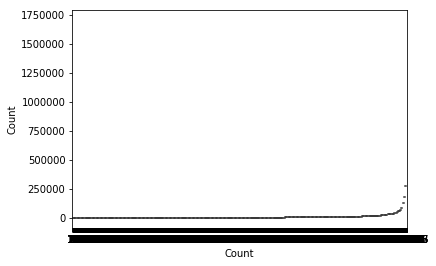

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(y=x, x='Count', 
                       data=df_sof_tags, 
                       width=0.8,
                       inner='quartile',
                       palette="colorblind")

# <font color='blus'>3. POST analysis</font>

In [43]:
import pandas as pd
file_name="./data/train_StackOverFlow_BodyTitleTags.csv"
df_sof_train=pd.read_csv(file_name)


In [44]:
print(df_sof_train.columns)

Index(['Id', 'PostTypeId', 'Body', 'Title', 'Tags'], dtype='object')


## <font color='blus'>3.1. Train data-set standardization</font>

**Merge Body and Title columns**

``Title`` elements are regarded as synthetisis of ``Body`` elements.

Merging ``Title`` with ``Body`` enreach ``Body`` contents with more relevant informations.

In [234]:
df_sof_train['Body']=df_sof_train['Body']+df_sof_train['Title']

**Dataset processing**

Expressions between markers ``code`` and ``/code`` are all removed.

Such expressions are computer language specifics, different as english language. It is considered as having  no semantic value for english language.

In [42]:
df_sof_train.columns

Index(['Id', 'PostTypeId', 'Body', 'Title', 'Tags'], dtype='object')

**Each one of the POST from corpus is tokenized**

In [43]:
import p6_util
dict_body_train = ser_sof_train.to_dict()

dict_tokenized = p6_util.corpus_tokenization(dict_body_train, token_mode='nltk')

In [11]:
ipost=10
list_tokeep = df_sof_tags.TagName.tolist()
list_tokeep.append("worked")
print("worked" in list_tokeep)
post= df_sof_train.Body[ipost]
print(post)

True
<p>I'm having issues getting the C sockets API to work properly in C++ on <code>z/OS</code>.</p>

<p>Although I am including <code>sys/socket.h</code>, I still get compile time errors telling me that <code>AF_INET</code> is not defined.</p>

<p>Am I missing something obvious, or is this related to the fact that being on <code>z/OS</code> makes my problems much more complicated?</p>

<hr>

<p><strong>Update</strong>: Upon further investigation, I discovered that there is an <code>#ifdef</code> that I'm hitting. Apparently <code>z/OS</code> isn't happy unless I define which "type" of sockets I'm using with:</p>

<pre><code>#define _OE_SOCKETS
</code></pre>

<p>Now, I personally have no idea what this <code>_OE_SOCKETS</code> is actually for, so if any <code>z/OS</code> sockets programmers are out there (all 3 of you), perhaps you could give me a rundown of how this all works?</p>

<hr>

<p>Test App</p>

<pre><code>#include &lt;sys/socket.h&gt;

int main()
{
    return AF_INET;
}
</c

In [12]:
import p6_util
ser = p6_util.p6_str_standardization(post, list_to_keep=list_tokeep\
                                     ,is_lem=False, verbose=True)
ser[0]
list_post=ser[0].split(" ")
print(list_post)


Cleaning text in-between markers <code></code> markers...

Cleaning LXML markers...

Remove non alpha-numeric words from sentences...

Remove verbs from sentences...

Removing stopwords...
['m', 'issues', 'c', 'sockets', 'api', 'properly', 'c++', 'which', 'basically', 'whole', 'file', 'sure']


In [13]:
str_title_token=df_sof_train.Title[ipost].lower()
print(str_title_token)
ser = p6_util.p6_str_standardization(str_title_token, list_to_keep=list_tokeep\
                                     ,is_lem=False, verbose=True)
ser[0]
list_post=ser[0].split(" ")
print(list_post)
list_title_token = str_title_token.split(" ")


how to use the c socket api in c++ on z/os

Cleaning text in-between markers <code></code> markers...

Cleaning LXML markers...

Remove non alpha-numeric words from sentences...

Remove verbs from sentences...

Removing stopwords...
['c', 'socket', 'api', 'c++', 'z', 'os']


In [14]:
import p6_util
list_tag_a = df_sof_train.Tags[ipost].lower()
list_tag_a=p6_util.clean_marker_text(list_tag_a, leading_marker='<', trailing_marker='>')
print(list_tag_a)

['c++', 'c', 'sockets', 'mainframe', 'zos']


In [15]:
list_tag_r = df_sof_tags.TagName.tolist()
set(ser[0]).intersection(list_tag_a+list_title_token)
list_post=list(set(list_post+list_title_token))
print("List from POST= "+str(list_post))
print("List from LIST_TAG_A= "+str(list_tag_a))
print()
print("POST intersection LIST_TAG_A : "+str(set(list_post).intersection(list_tag_a)))
print("POST intersection LIST_TAG_R : "+str(set(list_post).intersection(list_tag_r)))
print("LIST_TAG_A intersection LIST_TAG_R : "+str(set(list_tag_a).intersection(list_tag_r)))
"m" in list_tokeep

List from POST= ['on', 'os', 'socket', 'c', 'z/os', 'to', 'the', 'how', 'in', 'use', 'z', 'c++', 'api']
List from LIST_TAG_A= ['c++', 'c', 'sockets', 'mainframe', 'zos']

POST intersection LIST_TAG_A : {'c', 'c++'}
POST intersection LIST_TAG_R : {'c', 'c++', 'api'}
LIST_TAG_A intersection LIST_TAG_R : {'zos', 'c', 'mainframe', 'sockets', 'c++'}


True

**List of text processing allowing to standardize a post**

In [231]:

import p6_util
cleaned_sentance = p6_util.cb_remove_marker(post,'code')
print(cleaned_sentance)
print()

import p6_util
cleaned_sentance = p6_util.cb_clean_lxml(cleaned_sentance)
print(cleaned_sentance)
print()


cleaned_sentance = p6_util.cb_sentence_filter(cleaned_sentance)
print(cleaned_sentance)
print()


import p6_util
cleaned_sentance = p6_util.cb_remove_verb_from_sentence(cleaned_sentance, list_to_keep=list_tokeep)
print(cleaned_sentance)
print()

import p6_util
cleaned_sentance = p6_util.cb_remove_stopwords(cleaned_sentance, list_to_keep=list_tokeep)
print(cleaned_sentance)
print()


<p>i'm having issues getting the c sockets api to work properly in c++ on </pre><p>which encapsulates basically the whole file. not sure if it matters.</p>

i'm having issues getting the c sockets api to work properly in c++ on which encapsulates basically the whole file. not sure if it matters.

i m having issues getting the c sockets api to work properly in c++ on which encapsulates basically the whole file  not sure if it matters 

i m issues the c sockets api to properly in c++ on which basically the whole file not sure if it

m issues c sockets api properly c++ which basically whole file sure



In [187]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import p5_util

lemmatizer=WordNetLemmatizer()
cleaned_sentance = p5_util.cb_lemmatizer(cleaned_sentance, lemmatizer, mode='lower')
print(cleaned_sentance)

m issue c socket api properly c++ which basically whole file sure c socket api c++ z o


In [158]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk

import p5_util

stemmer=nltk.stem.SnowballStemmer('english')
cleaned_sentance = p5_util.cb_stemmer(cleaned_sentance, stemmer, mode='lower')
print(cleaned_sentance)

track bar form opac code control work code work fine past vb net project convert decim doubl i


**Body standardization**

In [46]:
ser_sof_train_body =  p6_util.p6_df_standardization(df_sof_train.Body, is_lem=False, \
                                               list_to_keep=df_sof_tags.TagName.tolist())


Cleaning text in-between markers <code></code> markers...

Cleaning LXML markers...

Remove non alpha-numeric words from sentences...

Remove verbs from sentences...

Removing stopwords...


In [50]:
import p5_util
file_name='./data/ser_sof_train_body.dump'
p5_util.object_dump(ser_sof_train_body, file_name)

**Body + Title standardization**

In [236]:
import p6_util

ser_sof_train = p6_util.p6_df_standardization(df_sof_train.Body, is_lem=False, \
                                               list_to_keep=df_sof_tags.TagName.tolist())


Cleaning text in-between markers <code></code> markers...

Cleaning LXML markers...

Remove non alpha-numeric words from sentences...

Remove verbs from sentences...

Removing stopwords...


In [237]:
ser_sof_train[ipost]

'm issues c sockets api properly c++ which basically whole file sure c socket api c++ z os'

In [238]:
import p5_util
file_name='./data/ser_sof_train.dump'
p5_util.object_dump(ser_sof_train, file_name)

## <font color='blus'>3.2. Posts analysis</font>

### <font color='blus'>3.2.0. Words from Body occurrencies</font>

**Standardized dataset is loaded from dumped file**

In [37]:
import p5_util
file_name='./data/ser_sof_train_body.dump'
ser_sof_train_body = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/ser_sof_train_body.dump


In [38]:
ser_sof_train_body[0]

'track bar form s opacity this code control work this code fine past vb net project'

In [43]:
import p6_util
df_word_count = p6_util.ser_corpus_2_df_word_count(ser_sof_train_body, token_mode='split')

Series ``ser_sof_train_body`` is converted into a dictionary in order to feed ``compute_frequency_sentence`` function.

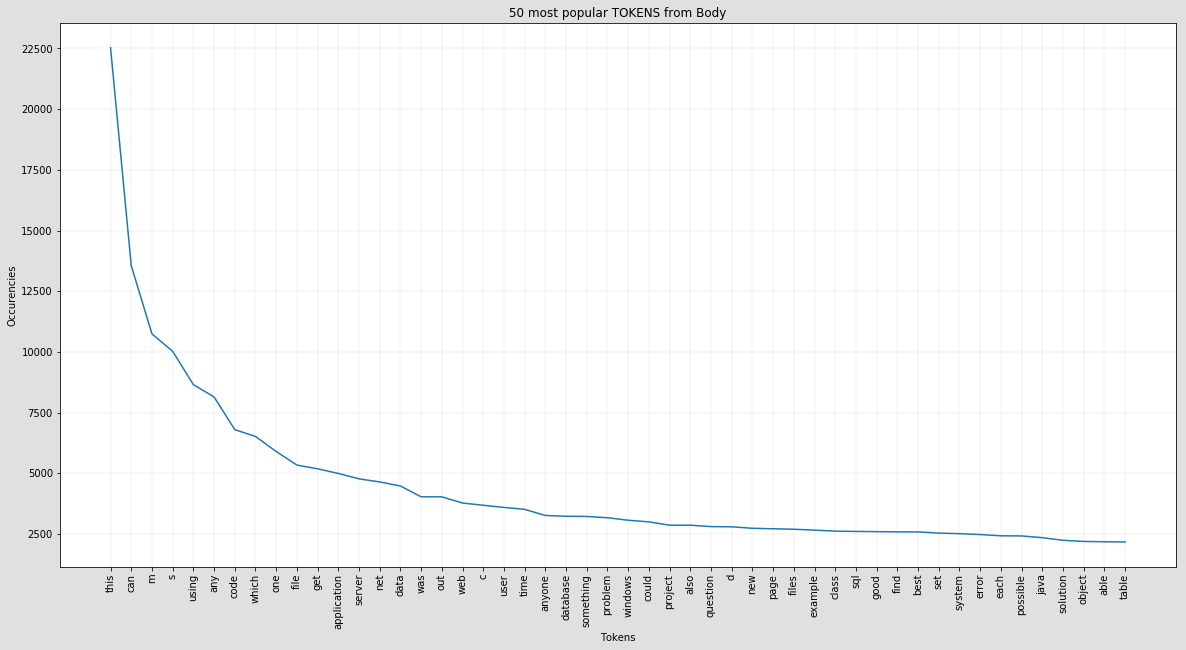

In [47]:
import p6_util_plot

item_count=50
title = str(item_count)+" most popular TOKENS from Body"
p6_util_plot.ser_item_occurency_plot(df_word_count.Word,df_word_count.Count\
                                     ,item_count, title, p_reverse=True\
                                     , p_x_title="Tokens", p_y_title="Occurencies")

In [45]:
len(df_sof_tags.TagName.tolist())

50000

In [46]:
intersection_count = len(set(df_sof_tags.TagName.tolist()).intersection(df_word_count.Word.tolist()))
reftags_count = len(df_sof_tags.TagName.tolist())
print("Percent of TAG found in Body : {0:1.2F}%".format(100*intersection_count/reftags_count))
print("Distribution of ref. TAG in Body = {0:1.2F}%".format(100*intersection_count/len(df_word_count.Word.tolist())))

Percent of TAG found in Body : 13.78%
Distribution of ref. TAG in Body = 18.14%


### <font color='blus'>3.2.1. Words from Body+Titles occurrencies</font>

**Standardized dataset is loaded from dumped file**

In [31]:
import p5_util
file_name='./data/ser_sof_train.dump'
ser_sof_train = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/ser_sof_train.dump


**Tokens occurencies are computed**

Series ``ser_sof_train`` is converted into a dictionary in order to feed ``compute_frequency_sentence`` function.

In [32]:
import p6_util

df_word_count = p6_util.ser_corpus_2_df_word_count(ser_sof_train, token_mode='nltk')

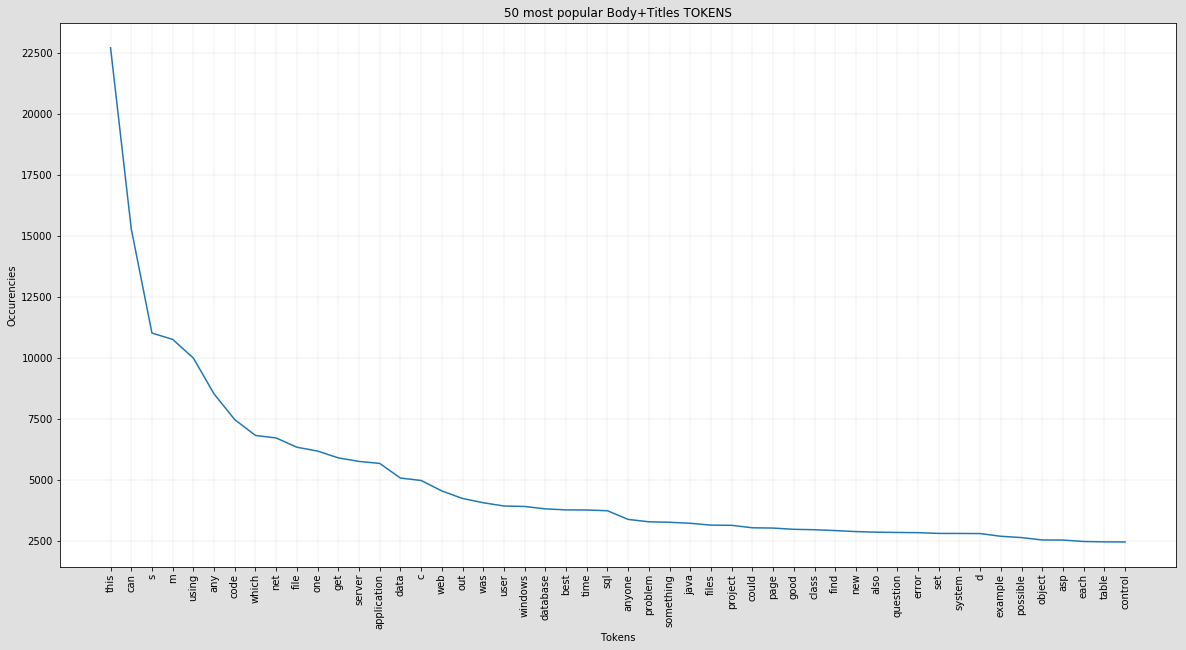

In [33]:
import p6_util_plot

item_count=50
title = str(item_count)+" most popular Body+Titles TOKENS"
p6_util_plot.ser_item_occurency_plot(df_word_count.Word,df_word_count.Count\
                                     ,item_count, title, p_reverse=True\
                                     , p_x_title="Tokens", p_y_title="Occurencies")

In [36]:
intersection_count = len(set(df_sof_tags.TagName.tolist()).intersection(df_word_count.Word.tolist()))
reftags_count = len(df_sof_tags.TagName.tolist())
print("Percent of TAG found in Body+Titles : {0:1.2F}%".format(100*intersection_count/reftags_count))
print("Distribution of ref. TAG in Body+Titles = {0:1.2F}%".format(100*intersection_count/len(df_word_count.Word.tolist())))

Percent of TAG found in Body+Titles : 14.29%
Distribution of ref. TAG in Body+Titles = 17.84%


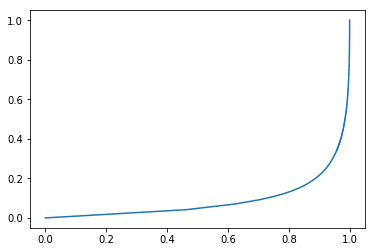

0.8229854463936235

In [74]:
import numpy as np

dep =df_word_count.Count.values

import matplotlib.pyplot as plt

lorenz = np.cumsum(np.sort(df_word_count.Count)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.show()

# Pour l'indice de GINI
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

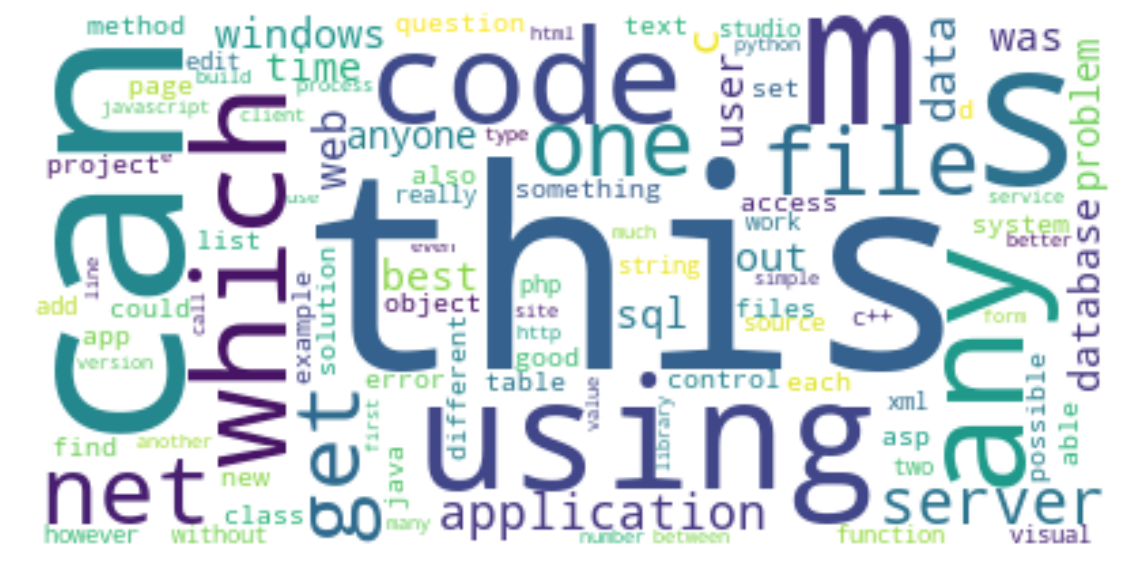

In [247]:
import p6_util_plot
p6_util_plot.display_word_cloud(freq_body_train)

<Figure size 720x720 with 0 Axes>

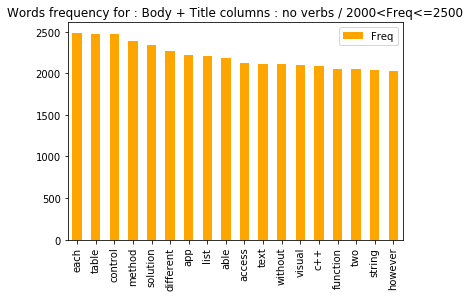

In [249]:
#from wordcloud import WordCloud, STOPWORDS 
import p6_util_plot
p6_util_plot.dict_plot_frequency(freq_body_train, "Body + Title columns : no verbs", query="2000<Freq<=2500")

<Figure size 720x720 with 0 Axes>

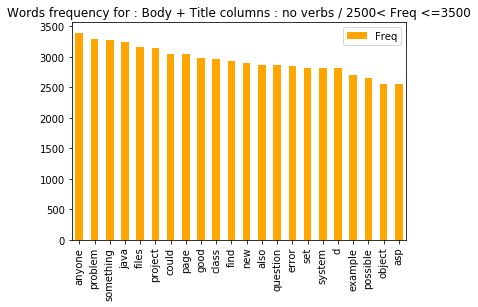

In [250]:
import p6_util_plot
p6_util_plot.dict_plot_frequency(freq_body_train, "Body + Title columns : no verbs", query="2500< Freq <=3500")

<Figure size 720x720 with 0 Axes>

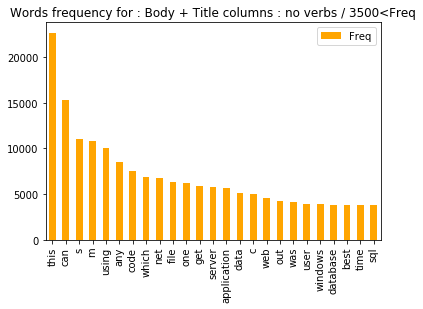

In [251]:
import p6_util_plot
p6_util_plot.dict_plot_frequency(freq_body_train, "Body + Title columns : no verbs", query="3500<Freq")

### <font color='blus'>3.2.2 Title analysis</font>

**<font color='blue'>Loading SOF TAGs as a referenced list</font>**

In [33]:
import pandas as pd
file_name="./data/StackOverFlowTags.csv"
df_sof_tags=pd.read_csv(file_name)
print(df_sof_tags.shape)
list_sof_tag = df_sof_tags.TagName.tolist( )

(50000, 2)


**<font color='blue'>Loading Title from Posts<font>**

In [23]:
import pandas as pd
file_name="./data/train_StackOverFlow_BodyTitleTags.csv"
ser_sof_title=pd.read_csv(file_name)['Title']
ser_sof_title.shape

(24604,)

**<font color='blue'>Titles processing</font>**

In [259]:
import p6_util
ser_sof_train_title = p6_util.p6_df_standardization(ser_sof_title, is_lem=False, \
                                               list_to_keep=df_sof_tags.TagName.tolist())


Cleaning text in-between markers <code></code> markers...

Cleaning LXML markers...

Remove non alpha-numeric words from sentences...

Remove verbs from sentences...

Removing stopwords...


In [260]:
ser_sof_train_title.shape

(24604,)

In [261]:
import p5_util
file_name='./data/ser_sof_train_title.dump'
p5_util.object_dump(ser_sof_train_title, file_name)

**<font color='blue'>Titles frequencies processing and plot</font>**

In [24]:
import p5_util
file_name='./data/ser_sof_train_title.dump'
ser_sof_train_title = p5_util.object_load(file_name)

p5_util.object_load : fileName= ./data/ser_sof_train_title.dump


In [25]:
import p6_util

df_word_count = p6_util.ser_corpus_2_df_word_count(ser_sof_train_title, token_mode='nltk')

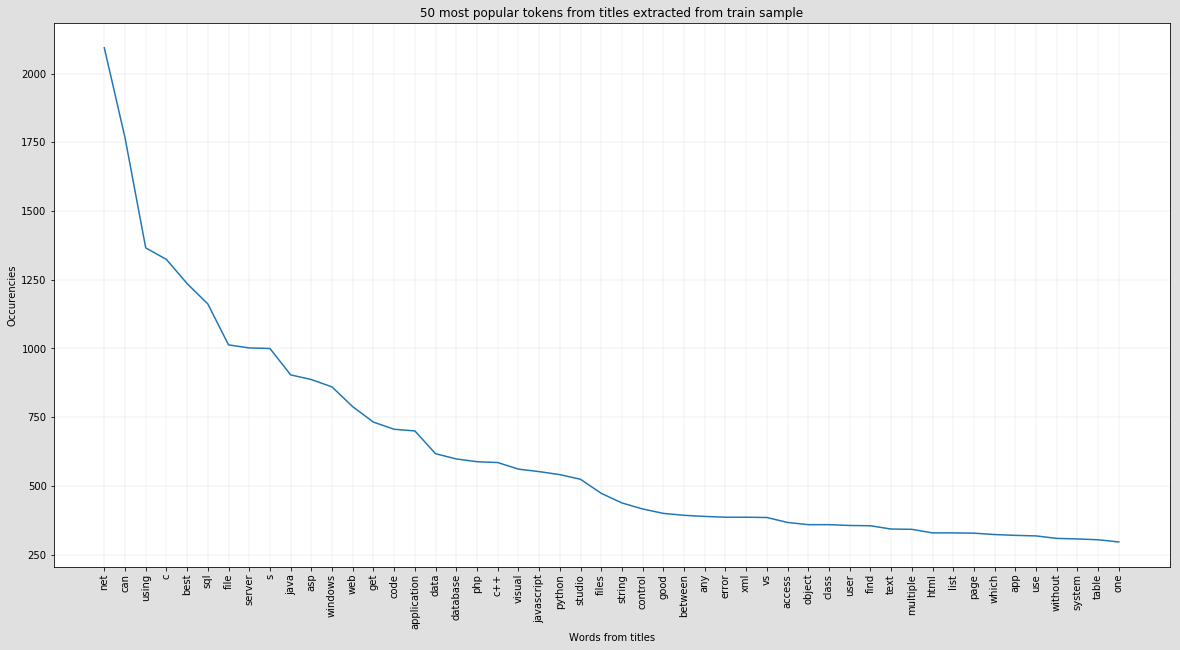

In [26]:
import p6_util_plot

item_count=50
title = str(item_count)+" most popular tokens from titles extracted from train sample"
p6_util_plot.ser_item_occurency_plot(df_word_count.Word,df_word_count.Count,item_count, title\
                                     ,p_y_title="Occurencies", p_x_title="Words from titles")

**Statistics of Titles tokens versus SOF TAGs**

In [29]:
intersection_count = len(set(df_sof_tags.TagName.tolist()).intersection(df_word_count.Word.tolist()))
reftags_count = len(df_sof_tags.TagName.tolist())
print("Percent of TAG found in titles : {0:1.2F}%".format(100*intersection_count/reftags_count))
print("Distribution of ref. TAG in titles = {0:1.2F}%".format(100*intersection_count/len(df_word_count.Word.tolist())))

Percent of TAG found in titles : 9.25%
Distribution of ref. TAG in titles = 42.86%


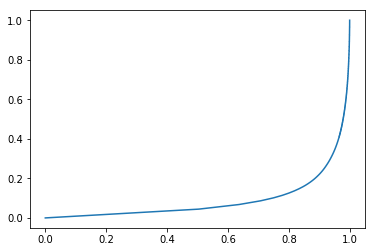

0.8209551428572897

In [33]:
import numpy as np

dep =df_word_count.Count.values

import matplotlib.pyplot as plt

lorenz = np.cumsum(np.sort(df_word_count.Count)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.show()

# Pour l'indice de GINI
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

### <font color='blus'>3.2.3. Assigned TAG analysis from train sample</font>

**Loading SOF TAGs as a referenced list**

In [48]:
import pandas as pd
file_name="./data/StackOverFlowTags.csv"
df_sof_tags=pd.read_csv(file_name)
print(df_sof_tags.shape)
list_sof_tag = df_sof_tags.TagName.tolist( )

(50000, 2)


**Loading TAGs from Posts**

In [76]:
import pandas as pd
file_name="./data/train_StackOverFlow_BodyTitleTags.csv"
ser_train_tags=pd.read_csv(file_name).Tags.copy()
ser_train_tags.shape

(24604,)

**Assigned TAG are tokenized**

In [77]:
import p6_util

ser_train_tags = ser_train_tags.apply(p6_util.clean_marker_text, leading_marker='<'\
    , trailing_marker='>')

In [78]:
ser_train_tags.iloc[0]

['c#', 'floating-point', 'type-conversion', 'double', 'decimal']

**MAX number of TAG in train dataset**

In [93]:
max_tag_a = 0
avg_tag_a=0.0
for index in range(0,ser_train_tags.shape[0]):
    tag_list = ser_train_tags[index]
    #print(type(tag_list))
    avg_tag_a += len(tag_list)
    max_tag_a = max(max_tag_a,len(tag_list))
avg_tag_a /=ser_train_tags.shape[0]
print("Max number of TAG per POST : "+str(max_tag_a))
print("Average number of TAG per POST : {0:1.2F}".format(avg_tag_a))


Max number of TAG per POST : 6
Average number of TAG per POST : 2.91


In [63]:
ser_train_tags = ser_train_tags.apply(lambda x:" ".join(x))

In [70]:
import p6_util

df_word_count = p6_util.ser_corpus_2_df_word_count(ser_train_tags, token_mode='split')

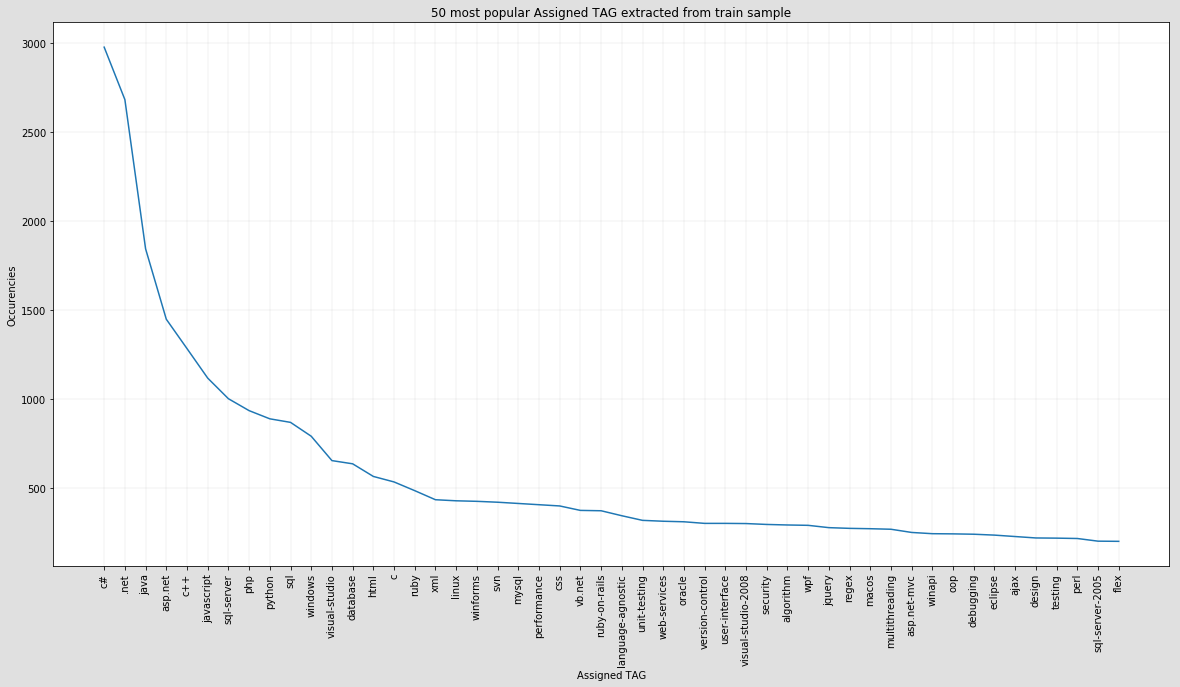

In [71]:
import p6_util_plot

item_count=50
title = str(item_count)+" most popular Assigned TAG extracted from train sample"
p6_util_plot.ser_item_occurency_plot(df_word_count.Word,df_word_count.Count,item_count, title\
                                     ,p_y_title="Occurencies", p_x_title="Assigned TAG")

In [72]:
intersection_count = len(set(df_sof_tags.TagName.tolist()).intersection(df_word_count.Word.tolist()))
reftags_count = len(df_sof_tags.TagName.tolist())
print("Percent of TAG_A found in TAG_R : {0:1.2F}%".format(100*intersection_count/reftags_count))
print("Distribution of TAG_R in TAG_A = {0:1.2F}%".format(100*intersection_count/len(df_word_count.Word.tolist())))

Percent of TAG_A found in TAG_R : 12.02%
Distribution of TAG_R in TAG_A = 93.38%


### <font color='blus'>3.3. Referenced TAG analysis</font>